## Rank the surfaces based on the screening readout

#### Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import PIL
import os
from rankFeaturesFunctions import calculateRank,plotSurfaceRankMeasurements,makePairPlot,filterRank,plotRank,boxPlotTopAndBottom,sortRanked,showImagesFlat,showImagesTopAndBottom
from scipy.stats import ks_2samp, anderson_ksamp

#### Step 1: Load the data objects

In [2]:
pathToImageObject=os.getcwd()+"/DataAnalysis/"       
locationOfImageObject=pathToImageObject+"imageOutliersRemoved.csv"
# check if file exists
if os.path.isfile(locationOfImageObject):
    imagedata=pd.read_csv(locationOfImageObject,low_memory=False)
    # replace any empty strings with NaNs
    imagedata=imagedata.replace('', np.nan)
else:
    print("File not found, check if you finished outlier removal")


#### Step 2: Rank the data based on feature of interest

##### Step 2.1: Select the feature of interest

In [3]:
## write an console to select the feature of interest
featureOfInterestUser="Count_CellBody"

##### Step 2.2: rank the surfaces to the feature of interest

In [4]:
imagedata['FeatureIdx'].value_counts()

2177    12
1087     6
1065     6
1231     6
1198     6
        ..
2170     5
2117     5
1985     5
977      5
1054     4
Name: FeatureIdx, Length: 2177, dtype: int64

In [5]:
# imagedata_and_counts = imagedata.merge(imagedata['FeatureIdx'].value_counts(),left_on='FeatureIdx', right_index=True)
# imagedata = imagedata[imagedata_and_counts.FeatureIdx_y > 1]

In [6]:
imagedata

,Unnamed: 0,Channel_CellBody,Channel_DNA,Channel_Target,Count_CellBody,Count_FilteredNuclei,Count_FilteredNucleiISO,Count_IdentifyPrimaryObjects,Count_Nephrin,ExecutionTime_01Images,...,StDev_FilteredNuclei_Nehpr_Location_Center_Z,StDev_FilteredNuclei_Nehpr_Parent_IdentifyPrimaryObjects,StDev_IdentifyPrimaryObjects_Children_FilteredNuclei_Nehpr_Count,StDev_Nephrin_Parent_FilteredNuclei_Nehpr,Metadata_Row,Metadata_Col,FeatureIdx,Metadata_Quadrant,Metadata_Duplicate,Metadata_Chip
0,0,-1,-1,-1,37.0,36.0,37.0,39.0,36.0,0.0,...,NaN,NaN,NaN,NaN,1,1,1087,A,0,8
1,1,-1,-1,-1,42.0,42.0,42.0,42.0,42.0,0.0,...,NaN,NaN,NaN,NaN,2,1,1054,A,0,8
2,2,-1,-1,-1,23.0,24.0,23.0,24.0,24.0,0.0,...,NaN,NaN,NaN,NaN,3,1,1021,A,0,8
3,3,-1,-1,-1,29.0,29.0,29.0,30.0,29.0,0.0,...,NaN,NaN,NaN,NaN,4,1,988,A,0,8
4,4,-1,-1,-1,21.0,21.0,21.0,22.0,21.0,0.0,...,NaN,NaN,NaN,NaN,5,1,955,A,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,4351,-1,-1,-1,72.0,72.0,NaN,72.0,67.0,0.0,...,0.0,20.308974,0.254208,19.339080,62,66,132,A,1,10
13045,4352,-1,-1,-1,58.0,58.0,NaN,58.0,55.0,0.0,...,0.0,16.252512,0.221470,15.874508,63,66,99,A,1,10
13046,4353,-1,-1,-1,55.0,55.0,NaN,55.0,51.0,0.0,...,0.0,15.560945,0.259688,14.719601,64,66,66,A,1,10
13047,4354,-1,-1,-1,60.0,60.0,NaN,60.0,57.0,0.0,...,0.0,16.743755,0.217945,16.451950,65,66,33,A,1,10


In [7]:
surfacesRank=calculateRank(ScreenData=imagedata,
                           featureOfInterest=featureOfInterestUser)

C:\Users\20212358\NK_Marta_podocyte_anaysis\rankFeaturesFunctions.py:26: UserWarning: p-value capped: true value larger than 0.25
  _,_,pvalue=anderson_ksamp([sg1, sg2])


##### Step 2.3: Plot the scoring metrics of the ranked surfaces

In [8]:
surfacesRank.max()

FeatureIdx                        2177.000000
Screen_ADpvalue_Count_CellBody       0.250000
Screen_KSpvalue_Count_CellBody       1.000000
Screen_SNR_Count_CellBody            6.125915
Screen_Mean_Count_CellBody          83.333333
Screen_SD_Count_CellBody            49.922941
Screen_Median_Count_CellBody        87.000000
dtype: float64

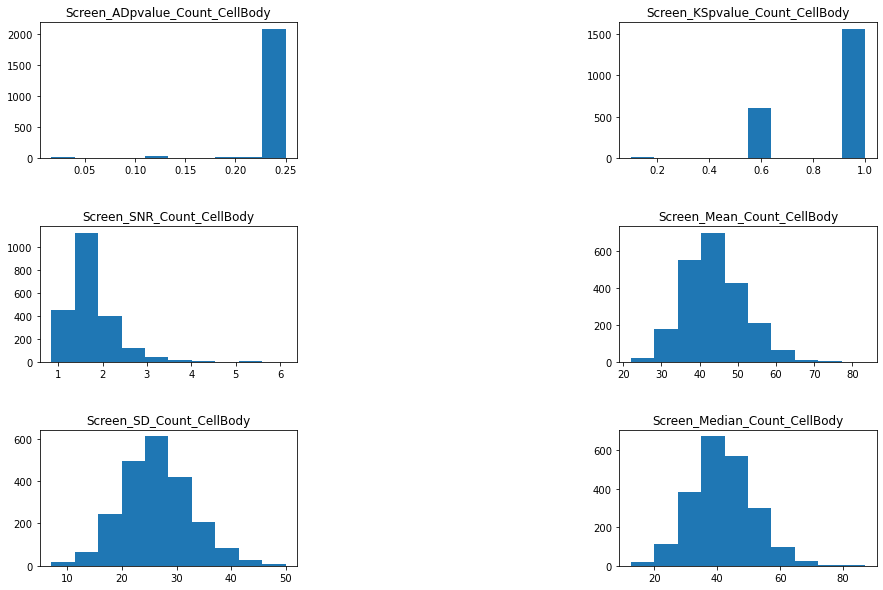

In [9]:
plotSurfaceRankMeasurements(surfacesRank)

##### Step 2.4: Display the relation between the different scoring metrics

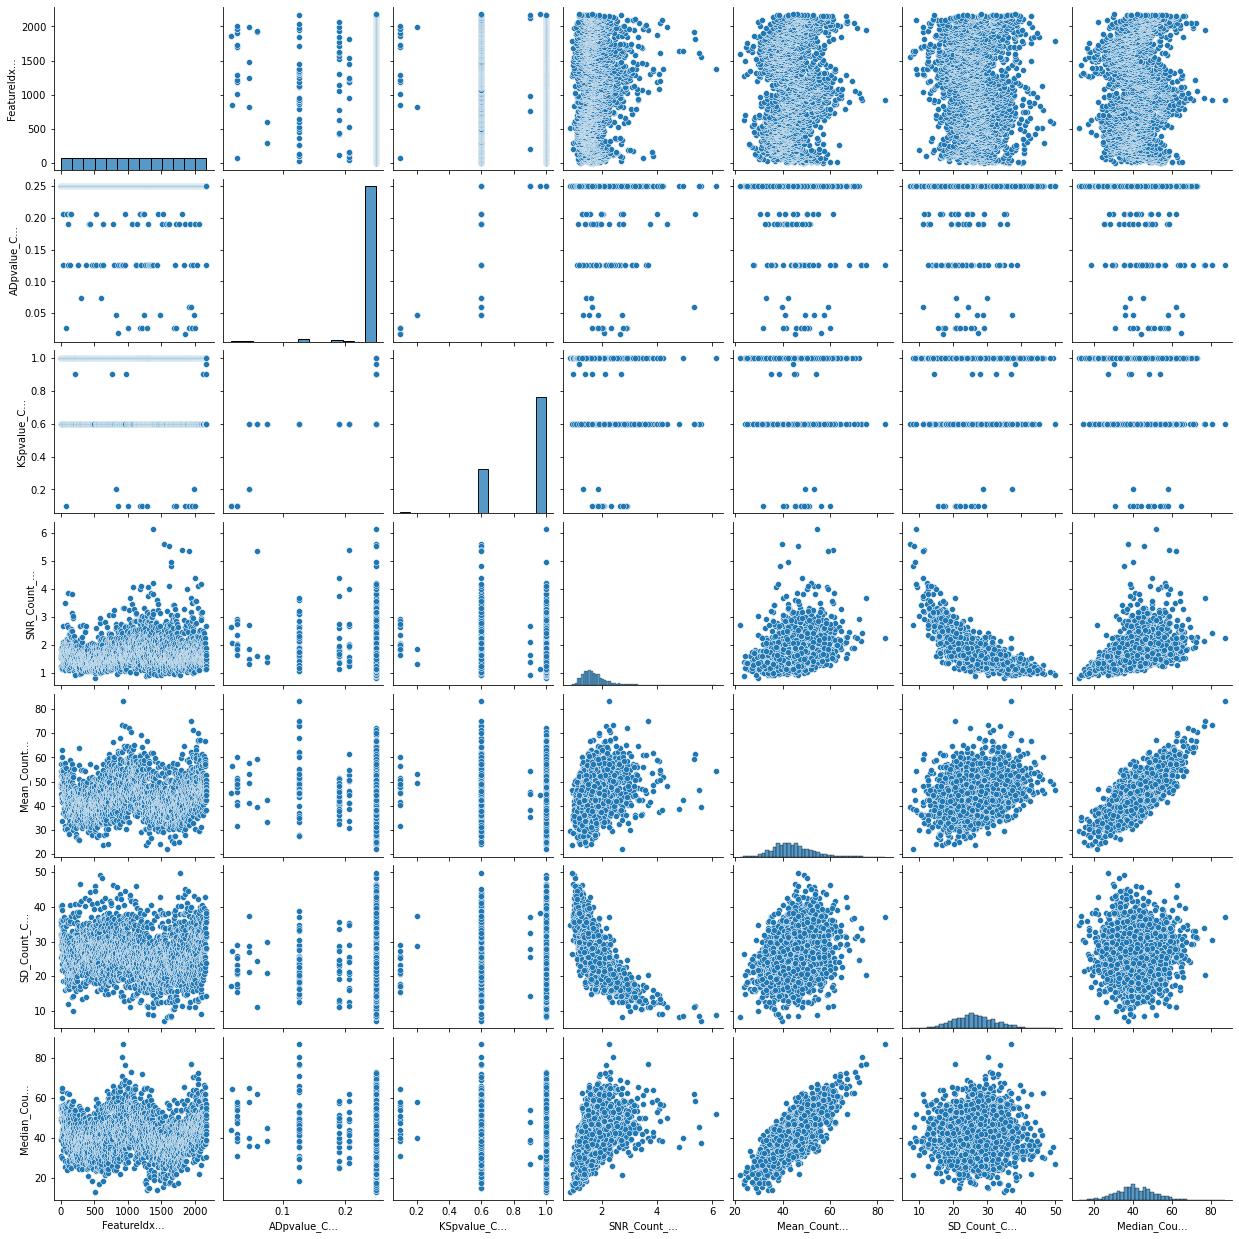

In [10]:
makePairPlot(surfacesRank)

#### Step 3: Filter the ranked data based on a feature of interest

Perfom a rank based filtering based on the p-value and the Signal to Noise Ratio (SNR)

step 3.1: filter the data based on the p-values, set the lower and upper bound of p-values to remove (default lower bound: 0.05 and upper bound:1)

In [11]:
# Lower and upper bound are the p-values not to select (so remove data if p-value>0.05)
metricOfInterestToFilter="Screen_ADpvalue_Count_CellBody"
lowerbound=0.05
upperbound=1

In [12]:
surfacesRankPVF=filterRank(rank=surfacesRank,
           filterMetric=metricOfInterestToFilter,
           valuesRangeToInclude=[lowerbound,upperbound])

17 unique surafces were excluded from the analysis
The following FeatureIdx were excluded based on the Screen_ADpvalue_Count_CellBody
71
819
852
1002
1180
1217
1248
1282
1478
1692
1727
1858
1911
1956
1960
1985
2012


step 3.2: filter the data based on the SNR ration, set the lower and upper bound of SNR values (default lower bound:1 and upper bound:20)

In [13]:
featureOfInterestToFilter2="Screen_SNR_Count_CellBody"
lowerbound=1
upperbound=20

In [14]:
surfacesRankPVF_SNR=filterRank(rank=surfacesRankPVF,
           filterMetric=featureOfInterestToFilter2,
           valuesRangeToInclude=[lowerbound,upperbound])

16 unique surafces were excluded from the analysis
The following FeatureIdx were excluded based on the Screen_SNR_Count_CellBody
205
287
506
578
837
1272
1287
1320
1354
1387
1433
1486
1493
1527
1688
1788


Step 3.4: Check how relations between ranking metrics changed after applying filtering steps

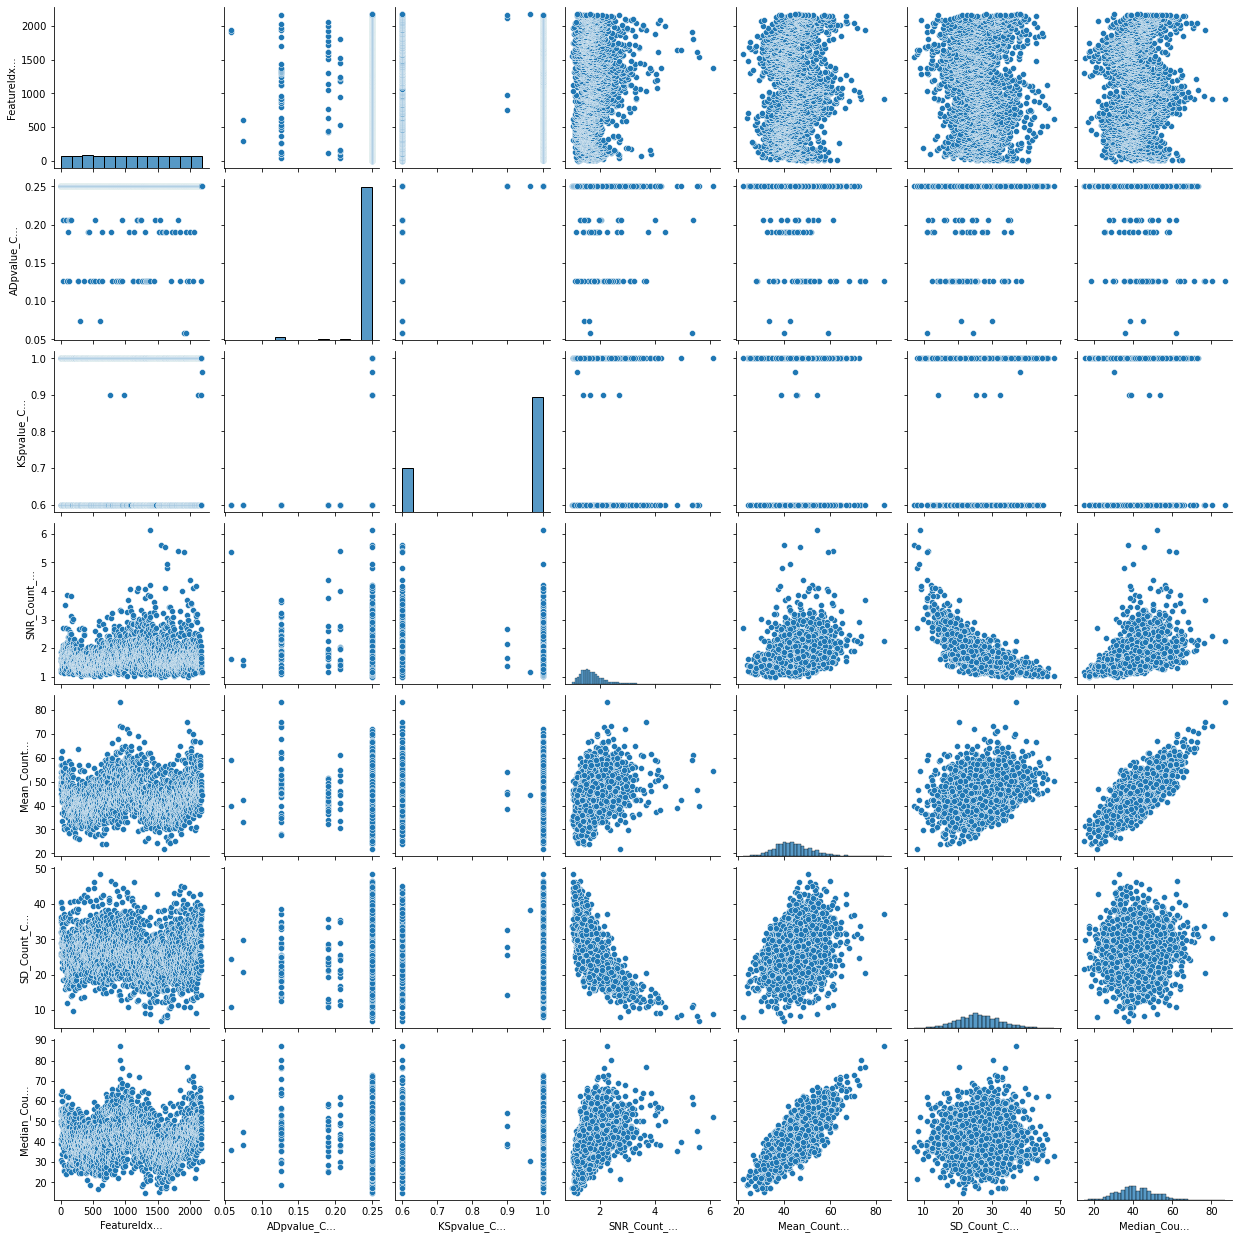

In [15]:
makePairPlot(surfacesRankPVF_SNR)

#### Step 4: Plot the ranking results

Step 4.1: Plot the rank versus the feature of interest (with the flat surface visualized by the large dot)

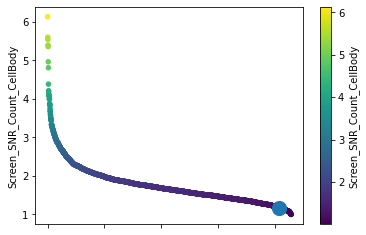

In [16]:
plotRank(rank=surfacesRankPVF_SNR, 
         featureOfInterest="Screen_SNR_Count_CellBody")

Step 4.2: Plot boxplots of the top and botom scoring surfaces

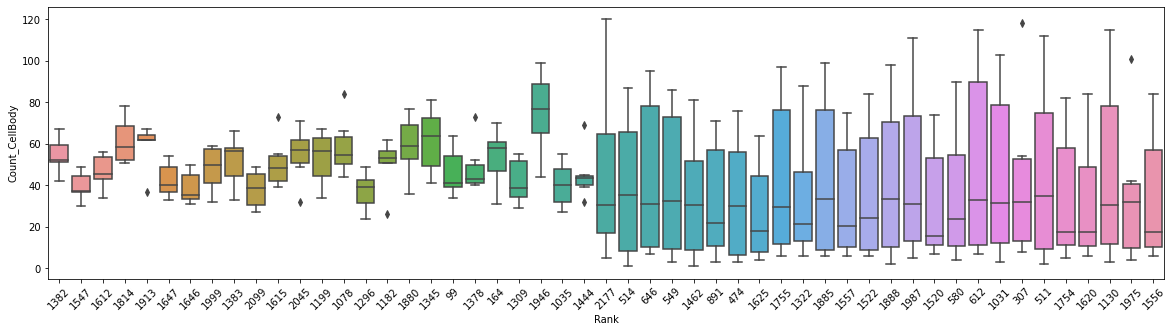

In [17]:
boxPlotTopAndBottom(screenData=imagedata,
                 rank=surfacesRankPVF_SNR,
                 featureOfInterest='Screen_SNR_Count_CellBody',
                numberOfSurfaces=25)

In [18]:
#showImagesFlat(ScreenData=rawImagedataFI_o2, 
#               featureOfInterest="Median_Nuclei_Intensity_IntegratedIntensity_CorrYap", 
#               stainingFile="FileName_actin", 
#               mode="raw" )

In [19]:
#showImagesTopAndBottom(rank=surfacesRankPVF_SNR, 
#                       ScreenData=rawImagedataFI_o2, 
#                       featureOfInterest="Screen_Mean_Median_Nuclei_Intensity_IntegratedIntensity_CorrYap",
#                       numberOfSurfaces=5, 
#                           stainingFile="FileName_Yap",
#                       mode="raw",
#                       surfPerRow=6)

#### Step 5: Perform a final ranking based on the feature of interest and save the data

In [20]:
FeatureOfInterestFinal="Screen_SNR_Count_CellBody"

In [21]:
surfacesRankPVF_SNR_sorted=sortRanked(rank=surfacesRankPVF_SNR, 
         featureOfInterest=FeatureOfInterestFinal)

In [22]:
surfacesRankPVF_SNR_sorted.to_csv(os.getcwd()+"/DataAnalysis/Ranking.csv", index=False)